# Exploratory data analysis (NETFLIX)

The Netflix dataset has information about the tv shows and movies available on netflix till 2021

,

## Import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read Csv files

In [30]:
df=pd.read_csv("D:\\Netflix Dataset.csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [10]:
df.shape

(7789, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [9]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [11]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

# Check duplicate values

In [14]:
dup=df.duplicated().any()

In [15]:
print(dup)

True


### Remove the Duplicate values

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(7787, 11)

# Handle Missing value

### Check Null Value

In [23]:
df.isnull().sum().sort_values(ascending=False)

Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Show_Id            0
Category           0
Title              0
Duration           0
Type               0
Description        0
dtype: int64

<AxesSubplot:>

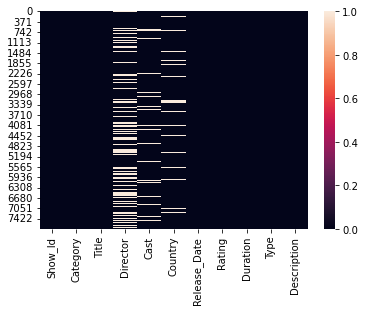

In [24]:
sns.heatmap(df.isnull())

### 1. For 'House of Cards', what is the Show Id and Who is the Director of this show 

In [29]:
df[df['Title'].str.contains('House of Cards')][['Show_Id','Director']]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


##### Create date column from existing Release_Date column

In [31]:
df['Date_N']=pd.to_datetime(df['Release_Date'])

In [32]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23


### 2. In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [36]:
High=df['Date_N'].dt.year.value_counts().sort_values(ascending=False)

<AxesSubplot:>

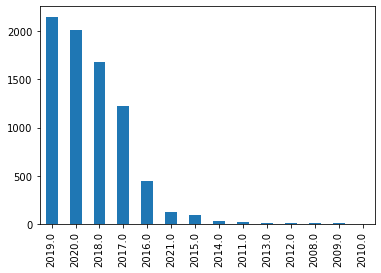

In [38]:
High.plot(kind='bar')

### 3. How many Movies & TV Shows are in the dataset 

In [39]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01


In [40]:
df['Category'].value_counts()

Movie      5379
TV Show    2410
Name: Category, dtype: int64

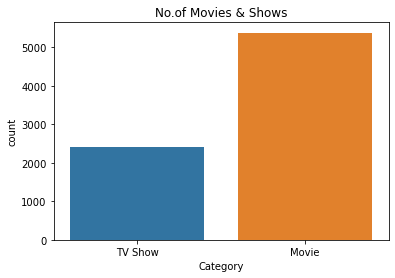

In [43]:

sns.countplot(x='Category',data=df)
plt.title('No.of Movies & Shows')
plt.show()

### 4. Show all the Movies that were released in year 2000.

#### Create only year column

In [44]:
df['Year']=df['Date_N'].dt.year

In [45]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0


#### Show Movies released in 2000

In [51]:
df[(df['Category']=='Movie')&(df['Year']==2000)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year


### 5. Show only the Titles of all TV Shows that were released in India only.

In [55]:
df[(df['Category']=='TV Show')&(df['Country']=='India')]['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

### 6. Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix

In [61]:
df['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Robert Rodriguez           8
Name: Director, dtype: int64

<AxesSubplot:>

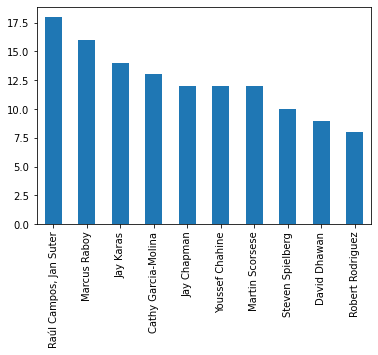

In [62]:
df['Director'].value_counts().head(10).plot(kind='bar')

### 7. Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom

In [66]:
df[(df['Category']=='Movie')&(df['Type']=='Comedies')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021.0
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,"April 16, 2019",R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019-04-16,2019.0
148,s149,Movie,A Bad Moms Christmas,"Jon Lucas, Scott Moore","Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...","United States, China","February 14, 2020",R,104 min,Comedies,"Stressed-out moms Amy, Carla and Kiki are back...",2020-02-14,2020.0
174,s175,Movie,A Futile and Stupid Gesture,David Wain,"Will Forte, Domhnall Gleeson, Martin Mull, Joe...",United States,"January 26, 2018",TV-MA,102 min,Comedies,"In a brief life full of triumph and failure, ""...",2018-01-26,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7341,s7340,Movie,Undercover Brother 2,Leslie Small,"Michael Jai White, Vince Swann, Barry Bostwick...",United States,"November 5, 2019",R,85 min,Comedies,When a beloved secret agent falls deep into a ...,2019-11-05,2019.0
7590,s7589,Movie,Where's the Money,Scott Zabielski,"Andrew Bachelor, Kat Graham, Mike Epps, Terry ...",United States,"January 22, 2018",R,86 min,Comedies,"Hunting for a stash of stolen money, a sharp-w...",2018-01-22,2018.0
7623,s7622,Movie,Wild Oats,Andy Tennant,"Shirley MacLaine, Jessica Lange, Billy Connoll...","Germany, United States","May 13, 2017",PG-13,86 min,Comedies,"When insurance accidentally pays her millions,...",2017-05-13,2017.0
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,"May 10, 2019",R,104 min,Comedies,When longtime friends meet up for a wine-soake...,2019-05-10,2019.0


In [71]:
df[(df['Category']=='Movie')&(df['Type']=='Comedies')|(df['Country']=='United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16,2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019-11-01,2019.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021.0
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,"August 1, 2017",TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017-08-01,2017.0
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01,2019.0
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020-03-18,2020.0
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017-12-31,2017.0


### 8. In how many movies/shows, Tom Cruise was cast

#### Create new dataframe

In [80]:
df_new=df.dropna()

#### HOW many movies tom act

In [79]:
df_new[df_new['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019.0


### 9.What are the different Ratings defined by Netflix

In [81]:
df['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

### 10.How many Movies got the 'TV-14' rating, in Canada 

In [84]:
len(df[(df['Category']=='Movie')&(df['Rating']=='TV-14')&(df['Country']=='Canada')])

11

### 11. How many TV Shows got the 'R' rating, after year 2018 ?


In [87]:
df[(df['Category']=='TV Show')&(df['Rating']=='R')&(df['Year']>2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019.0


### 11. What is the maximum duration of a Movie/Show on Netflix

In [91]:
df['Duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

#### split

In [92]:
df[['Minutes','Unit']]=df['Duration'].str.split(' ',expand=True)

In [93]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year,Minutes,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,93,min


In [95]:
df['Minutes'].max()

'99'

### 12. Which individual country has the Highest No. of TV Shows

In [97]:
df_tv=df[df['Category']=='TV Show']

<AxesSubplot:>

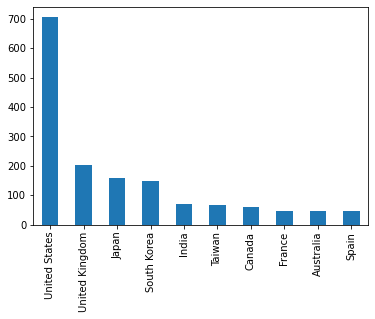

In [100]:
df_tv['Country'].value_counts().head(10).plot(kind='bar')

# SUMMARY & CONCLUSION

 United states have more television than any other country in the world
 
 More movies and tv shows released in 2019
